# Electricity price forecasting

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
%matplotlib inline
import seaborn as sns
import pickle
from tqdm import tqdm
import math
import os

In [2]:
pwd

'C:\\python\\Electricity price forecasting-Research project'

In [3]:
file= 'E:\CIT\MSc_AI\Research project_NIMBUS\Data\prices_jan2019_to_aug2020.csv'
data= pd.read_csv(file, delimiter= ';')
data.shape

(177292, 7)

In [4]:
data.head()

,id,applicable_date,measurement_name,market_name,val,time_interval_in_minutes,currency
0,1,2019-11-11 23:00:00,isem_prices,NI-DA,0.00,60,EUR
1,2,2019-11-12 00:00:00,isem_prices,NI-DA,0.00,60,EUR
2,3,2019-11-12 01:00:00,isem_prices,NI-DA,-0.38,60,EUR
3,4,2019-11-12 02:00:00,isem_prices,NI-DA,-0.50,60,EUR
4,5,2019-11-12 03:00:00,isem_prices,NI-DA,-1.00,60,EUR


In [5]:
data= data.rename(columns={"val": "elec_prices"})
data.head()

,id,applicable_date,measurement_name,market_name,elec_prices,time_interval_in_minutes,currency
0,1,2019-11-11 23:00:00,isem_prices,NI-DA,0.00,60,EUR
1,2,2019-11-12 00:00:00,isem_prices,NI-DA,0.00,60,EUR
2,3,2019-11-12 01:00:00,isem_prices,NI-DA,-0.38,60,EUR
3,4,2019-11-12 02:00:00,isem_prices,NI-DA,-0.50,60,EUR
4,5,2019-11-12 03:00:00,isem_prices,NI-DA,-1.00,60,EUR


In [6]:
cols= data.columns[2:]
for col in cols:
    print("Unique values in "+col+": ",data[col].unique())
    print("Value counts: \n",data[col].value_counts())
    print("\n\n")

Unique values in measurement_name:  ['isem_prices' 'isem_predicted_volumes']
Value counts: 
 isem_prices               155278
isem_predicted_volumes     22014
Name: measurement_name, dtype: int64



Unique values in market_name:  ['NI-DA' 'ROI-DA' 'NI-IDA1' 'ROI-IDA1' 'NI-IDA2' 'ROI-IDA2' 'NI-IDA3'
 'ROI-IDA3']
Value counts: 
 NI-IDA1     41532
ROI-IDA1    41531
NI-DA       20767
ROI-DA      20766
NI-IDA2     17596
ROI-IDA2    17596
NI-IDA3      8752
ROI-IDA3     8752
Name: market_name, dtype: int64



Unique values in elec_prices:  [ 0.    -0.38  -0.5   ... 40.359 43.946 48.888]
Value counts: 
 0.0       1014
55.0       657
65.0       546
70.0       517
60.0       469
          ... 
838.2        1
3214.2       1
564.5        1
244.9        1
526.0        1
Name: elec_prices, Length: 35679, dtype: int64



Unique values in time_interval_in_minutes:  [60 30]
Value counts: 
 30    135759
60     41533
Name: time_interval_in_minutes, dtype: int64



Unique values in currency:  ['EUR' 'GBP'

In [7]:
#checking for null values in all columns

cols= data.columns
for col in cols:
    print(col+": ",data[col].isnull().values.any())

id:  False
applicable_date:  False
measurement_name:  False
market_name:  False
elec_prices:  False
time_interval_in_minutes:  False
currency:  True


## Data cleaning

In [8]:
#data_= data
data= data[(data['currency'] == 'EUR') & (data['time_interval_in_minutes'] == 60) & (data['market_name']== 'ROI-DA')]
data.shape

(9159, 7)

In [9]:
print("Currency :",data['currency'].isnull().values.any())

Currency : False


In [10]:
data.head()

,id,applicable_date,measurement_name,market_name,elec_prices,time_interval_in_minutes,currency
72,73,2019-11-11 23:00:00,isem_prices,ROI-DA,0.00,60,EUR
73,74,2019-11-12 00:00:00,isem_prices,ROI-DA,0.00,60,EUR
74,75,2019-11-12 01:00:00,isem_prices,ROI-DA,-0.38,60,EUR
75,76,2019-11-12 02:00:00,isem_prices,ROI-DA,-0.50,60,EUR
76,77,2019-11-12 03:00:00,isem_prices,ROI-DA,-1.00,60,EUR


In [11]:
#eliminating columns
data= data.drop(['id', 'market_name','time_interval_in_minutes','currency'], axis=1)

In [12]:
data.head()

,applicable_date,measurement_name,elec_prices
72,2019-11-11 23:00:00,isem_prices,0.00
73,2019-11-12 00:00:00,isem_prices,0.00
74,2019-11-12 01:00:00,isem_prices,-0.38
75,2019-11-12 02:00:00,isem_prices,-0.50
76,2019-11-12 03:00:00,isem_prices,-1.00


In [13]:
data['measurement_name'].value_counts()

isem_prices    9159
Name: measurement_name, dtype: int64

In [14]:
data= data.reset_index(drop=True)
data.head()

,applicable_date,measurement_name,elec_prices
0,2019-11-11 23:00:00,isem_prices,0.00
1,2019-11-12 00:00:00,isem_prices,0.00
2,2019-11-12 01:00:00,isem_prices,-0.38
3,2019-11-12 02:00:00,isem_prices,-0.50
4,2019-11-12 03:00:00,isem_prices,-1.00


In [17]:
data['measurement_name'].unique()

array(['isem_prices'], dtype=object)

In [18]:
data.to_excel('output.xlsx')

In [20]:
data = pd.read_excel('E:\CIT\MSc_AI\Research project_NIMBUS\Data\output.xlsx',dtype={'applicable_date': str})
print(data.shape)
data.head()

(9686, 3)


,applicable_date,measurement_name,elec_prices
0,2019-11-11 23:00:00,isem_prices,0.00
1,2019-11-12 00:00:00,isem_prices,0.00
2,2019-11-12 01:00:00,isem_prices,-0.38
3,2019-11-12 02:00:00,isem_prices,-0.50
4,2019-11-12 03:00:00,isem_prices,-1.00


In [28]:
data['date']= [d.split(" ")[0] for d in data['applicable_date']]
data['time_stamp']= [d.split(" ")[1] for d in data['applicable_date']]

In [29]:
data.head()

,applicable_date,measurement_name,elec_prices,date,time_stamp
0,2019-11-11 23:00:00,isem_prices,0.00,2019-11-11,23:00:00
1,2019-11-12 00:00:00,isem_prices,0.00,2019-11-12,00:00:00
2,2019-11-12 01:00:00,isem_prices,-0.38,2019-11-12,01:00:00
3,2019-11-12 02:00:00,isem_prices,-0.50,2019-11-12,02:00:00
4,2019-11-12 03:00:00,isem_prices,-1.00,2019-11-12,03:00:00


In [30]:
ind_2019= [index for index,d in enumerate(data['date']) if d.split("-")[0]=='2019']
print("2019 data instances:",len(ind_2019))

2019 data instances: 7477


In [31]:
data= data.iloc[ind_2019]
data.shape

(7477, 5)

In [ ]:
#data['new_date']= [d.split(" ")[0]+" "+d.split(" ")[1].split(":")[0]+":"+d.split(" ")[1].split(":")[1] for d in data['applicable_date']]

### Reading external data

In [33]:
file= 'E:\CIT\MSc_AI\Research project_NIMBUS\Data\External_data.xlsx'
ext_data= pd.read_excel(file, sheet_name='exogenous', dtype={'date': str})

In [34]:
ext_data.head()

,date,rain_d,temp_d,wdsp_d,wddir_d,rain_c,temp_c,wdsp_c,wddir_c,rain_g,temp_g,wdsp_g,wddir_g,daily_oil_price,daily_natural_gas
0,2019-01-01 00:00:00,0.0,8.8,9,250,0.0,8.5,4,240,0.0,9.9,4,260,59.41,2.93
1,2019-01-01 01:00:00,0.0,8.3,9,250,0.0,8.5,3,270,0.0,9.3,4,240,59.41,2.93
2,2019-01-01 02:00:00,0.0,8.4,8,240,0.0,8.4,3,280,0.0,9.2,5,240,59.41,2.93
3,2019-01-01 03:00:00,0.0,8.6,8,250,0.0,8.5,5,260,0.0,9.1,5,250,59.41,2.93
4,2019-01-01 04:00:00,0.0,8.4,10,250,0.0,8.5,5,270,0.0,8.8,4,250,59.41,2.93


In [35]:
ext_data.shape

(8760, 15)

### Merging external data and ISEM price data

In [36]:
data = data.join(ext_data.set_index('date'), on='applicable_date')

In [37]:
data.head()

,applicable_date,measurement_name,elec_prices,date,time_stamp,rain_d,temp_d,wdsp_d,wddir_d,rain_c,temp_c,wdsp_c,wddir_c,rain_g,temp_g,wdsp_g,wddir_g,daily_oil_price,daily_natural_gas
0,2019-11-11 23:00:00,isem_prices,0.00,2019-11-11,23:00:00,0.0,3.1,15,260,0.1,3.9,11,260,0.0,4.3,9,290,62.58,2.50
1,2019-11-12 00:00:00,isem_prices,0.00,2019-11-12,00:00:00,0.0,2.8,15,260,0.1,3.8,12,270,0.1,3.9,9,290,62.19,2.72
2,2019-11-12 01:00:00,isem_prices,-0.38,2019-11-12,01:00:00,0.0,3.0,9,250,0.0,3.8,15,280,0.0,3.8,7,290,62.19,2.72
3,2019-11-12 02:00:00,isem_prices,-0.50,2019-11-12,02:00:00,0.0,2.3,10,250,0.1,3.5,11,280,0.0,3.6,6,290,62.19,2.72
4,2019-11-12 03:00:00,isem_prices,-1.00,2019-11-12,03:00:00,0.0,2.6,12,260,0.0,3.6,9,280,0.0,3.5,7,280,62.19,2.72


In [38]:
data.shape

(7477, 19)

In [39]:
data.isnull().values.any()

False

### Conversions

In [40]:
#converting natural gas spot prices to euros
data['daily_natural_gas'] = round(data['daily_natural_gas']*0.893,2) #average conversion rate from $ to euro= 0.893
#converting wind speed from knots to m/s
data['wdsp_d'] = data['wdsp_d']*0.514
data['wdsp_c'] = data['wdsp_c']*0.514
data['wdsp_g'] = data['wdsp_g']*0.514

In [41]:
data.head(5)

,applicable_date,measurement_name,elec_prices,date,time_stamp,rain_d,temp_d,wdsp_d,wddir_d,rain_c,temp_c,wdsp_c,wddir_c,rain_g,temp_g,wdsp_g,wddir_g,daily_oil_price,daily_natural_gas
0,2019-11-11 23:00:00,isem_prices,0.00,2019-11-11,23:00:00,0.0,3.1,7.710,260,0.1,3.9,5.654,260,0.0,4.3,4.626,290,62.58,2.23
1,2019-11-12 00:00:00,isem_prices,0.00,2019-11-12,00:00:00,0.0,2.8,7.710,260,0.1,3.8,6.168,270,0.1,3.9,4.626,290,62.19,2.43
2,2019-11-12 01:00:00,isem_prices,-0.38,2019-11-12,01:00:00,0.0,3.0,4.626,250,0.0,3.8,7.710,280,0.0,3.8,3.598,290,62.19,2.43
3,2019-11-12 02:00:00,isem_prices,-0.50,2019-11-12,02:00:00,0.0,2.3,5.140,250,0.1,3.5,5.654,280,0.0,3.6,3.084,290,62.19,2.43
4,2019-11-12 03:00:00,isem_prices,-1.00,2019-11-12,03:00:00,0.0,2.6,6.168,260,0.0,3.6,4.626,280,0.0,3.5,3.598,280,62.19,2.43


## Exploratory data analysis

In [42]:
def plot_pdf(data,feature):
    import warnings 
    warnings.filterwarnings("ignore")

    sns.FacetGrid(data,size=5) \
       .map(sns.distplot,feature) \
       .add_legend()
    plt.ylabel('PDF')
    plt.title("Probability distribution of "+feature)
    plt.grid()
    plt.show()

In [43]:
def scatter_plot(x,y,col_name):
    plt.figure(figsize=(15,6))
    plt.plot(x, y, 'o', color='blue')
    plt.title("Scatter plot of "+col_name)
    plt.xlabel("instances")
    plt.ylabel(col_name)

### Univariate Analysis of the target variable (price) 

In [44]:
# Basic stats:
data.elec_prices.describe()

count    7477.000000
mean       50.687397
std        24.000456
min       -11.860000
25%        38.230000
50%        47.669000
75%        59.540000
max       365.040000
Name: elec_prices, dtype: float64

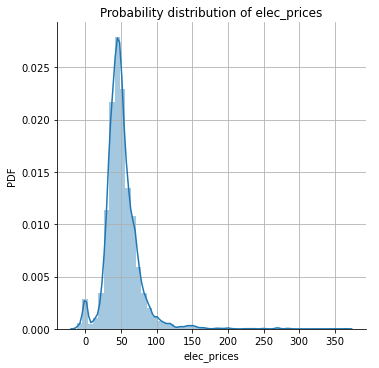

In [45]:
plot_pdf(data,'elec_prices')

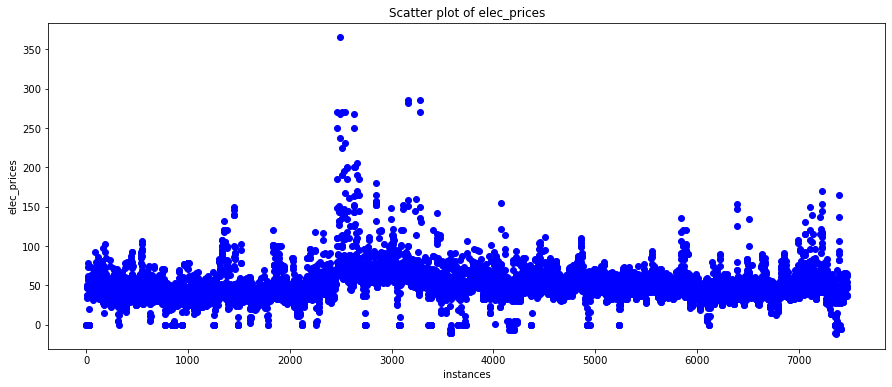

In [46]:
scatter_plot(range(data.shape[0]),data["elec_prices"].values,'elec_prices')

Text(0, 0.5, 'elec_prices')

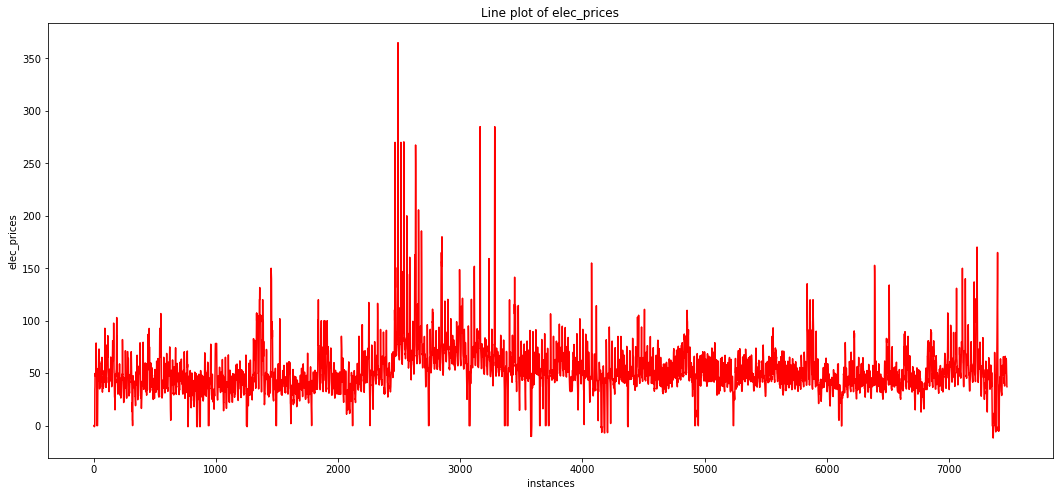

In [47]:
plt.figure(figsize=(18,8))
plt.plot(range(data.shape[0]), data["elec_prices"].values,color='red')
plt.title("Line plot of elec_prices")
plt.xlabel("instances")
plt.ylabel("elec_prices")

### Outlier removal

In [48]:
data.shape

(7477, 19)

In [49]:
from numpy import std
from numpy import mean
y= data.elec_prices.values
sigma= std(y)
data_mean= mean(y)
cut_off = 4*sigma
lower,upper= data_mean-4*sigma, data_mean+4*sigma
print("Lower limit: ",lower)
print("Upper limit: ", upper)
data= data[(data['elec_prices'] > lower) & (data['elec_prices'] < upper)]

Lower limit:  -45.30800875817871
Upper limit:  146.68280292696298


In [50]:
data.shape

(7416, 19)

In [51]:
print("Number of outliers removed: ",len(y)-data.shape[0])
print("Percentage : ", round((len(y)-data.shape[0])/len(y)*100,2))

Number of outliers removed:  61
Percentage :  0.82


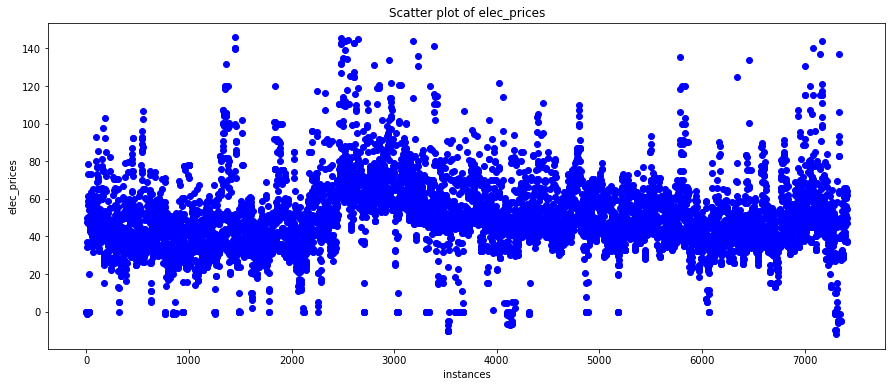

In [52]:
scatter_plot(range(data.shape[0]),data["elec_prices"].values,'elec_prices')

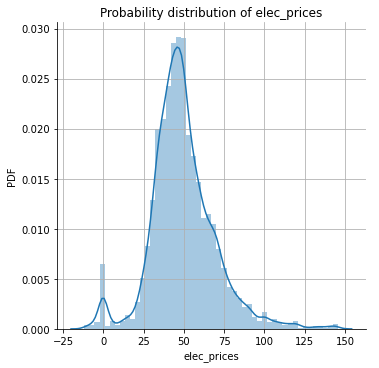

In [53]:
plot_pdf(data,'elec_prices')

### Feature correlation

In [54]:
def calc_PCC(x,y,feature):
    '''Function that takes 2 continuous variables and returns teh PCC value'''
    from scipy.stats import pearsonr
    corr, _ = pearsonr(x, y)
    print('Pearsons correlation for '+feature+ ' with electricity price: %.3f' % corr)

In [59]:
cols = data.columns.to_list()
x= data.elec_prices.values
for col in range(5,len(cols)):
    y = data[cols[col]].values
    calc_PCC(x,y,cols[col])

Pearsons correlation for rain_d with electricity price: -0.020
Pearsons correlation for temp_d with electricity price: -0.150
Pearsons correlation for wdsp_d with electricity price: -0.252
Pearsons correlation for wddir_d with electricity price: -0.013
Pearsons correlation for rain_c with electricity price: -0.054
Pearsons correlation for temp_c with electricity price: -0.127
Pearsons correlation for wdsp_c with electricity price: -0.297
Pearsons correlation for wddir_c with electricity price: -0.024
Pearsons correlation for rain_g with electricity price: -0.102
Pearsons correlation for temp_g with electricity price: -0.115
Pearsons correlation for wdsp_g with electricity price: -0.328
Pearsons correlation for wddir_g with electricity price: -0.043
Pearsons correlation for daily_oil_price with electricity price: -0.058
Pearsons correlation for daily_natural_gas with electricity price: 0.266


### Feature engineering

In [60]:
data.measurement_name.unique()

array(['isem_prices'], dtype=object)

In [61]:
data.head()

,applicable_date,measurement_name,elec_prices,date,time_stamp,rain_d,temp_d,wdsp_d,wddir_d,rain_c,temp_c,wdsp_c,wddir_c,rain_g,temp_g,wdsp_g,wddir_g,daily_oil_price,daily_natural_gas
0,2019-11-11 23:00:00,isem_prices,0.00,2019-11-11,23:00:00,0.0,3.1,7.710,260,0.1,3.9,5.654,260,0.0,4.3,4.626,290,62.58,2.23
1,2019-11-12 00:00:00,isem_prices,0.00,2019-11-12,00:00:00,0.0,2.8,7.710,260,0.1,3.8,6.168,270,0.1,3.9,4.626,290,62.19,2.43
2,2019-11-12 01:00:00,isem_prices,-0.38,2019-11-12,01:00:00,0.0,3.0,4.626,250,0.0,3.8,7.710,280,0.0,3.8,3.598,290,62.19,2.43
3,2019-11-12 02:00:00,isem_prices,-0.50,2019-11-12,02:00:00,0.0,2.3,5.140,250,0.1,3.5,5.654,280,0.0,3.6,3.084,290,62.19,2.43
4,2019-11-12 03:00:00,isem_prices,-1.00,2019-11-12,03:00:00,0.0,2.6,6.168,260,0.0,3.6,4.626,280,0.0,3.5,3.598,280,62.19,2.43


#### Rain

In [62]:
x= data.elec_prices.values
rain_sum= (data['rain_d']+data['rain_c']+data['rain_g']).values
rain_sq= (data['rain_d']*data['rain_d']+data['rain_c']*data['rain_c']+data['rain_g']*data['rain_g']).values
rain_sum_log= np.log(rain_sum+ 0.00001)
rain_sum_sqrt= np.sqrt(rain_sum)

calc_PCC(x,rain_sum,'rain_sum')
calc_PCC(x,rain_sq,'rain_sq')
calc_PCC(x,rain_sum_log,'rain_sum_log')
calc_PCC(x,rain_sum_sqrt,'rain_sum_sqrt')

Pearsons correlation for rain_sum with electricity price: -0.090
Pearsons correlation for rain_sq with electricity price: -0.036
Pearsons correlation for rain_sum_log with electricity price: -0.137
Pearsons correlation for rain_sum_sqrt with electricity price: -0.127


#### Wind direction

In [63]:
x= data.elec_prices.values
wind_sum= (data['wddir_d']+data['wddir_c']+data['wddir_g']).values
wind_sqr= (data['wddir_d']*data['wddir_d']+data['wddir_c']*data['wddir_c']+data['wddir_g']*data['wddir_g']).values
wind_sum_log= np.log(wind_sum)
wind_sum_sqrt= np.sqrt(wind_sum)

calc_PCC(x,wind_sum,'wind_sum')
calc_PCC(x,wind_sqr,'wind_sqr')
calc_PCC(x,wind_sum_log,'wind_sum_log')
calc_PCC(x,wind_sum_sqrt,'wind_sum_sqrt')

Pearsons correlation for wind_sum with electricity price: -0.033
Pearsons correlation for wind_sqr with electricity price: -0.017
Pearsons correlation for wind_sum_log with electricity price: -0.031
Pearsons correlation for wind_sum_sqrt with electricity price: -0.033


#### Oil prices

In [64]:
x= data.elec_prices.values
oil= data['daily_oil_price'].values
oil_sqr= oil*oil
oil_sqrt= np.sqrt(oil)
oil_log= np.log(oil)

calc_PCC(x,oil_sqr,'oil_sqr')
calc_PCC(x,oil_sqrt,'oil_sqrt')
calc_PCC(x,oil_log,'oil_log')

Pearsons correlation for oil_sqr with electricity price: -0.054
Pearsons correlation for oil_sqrt with electricity price: -0.060
Pearsons correlation for oil_log with electricity price: -0.062


#### Natural gas prices

In [65]:
x= data.elec_prices.values
ng = data.daily_natural_gas.values
ng_sqr = ng*ng
ng_sqrt = np.sqrt(ng)
ng_log= np.log(ng)

calc_PCC(x,ng_sqr,'ng_sqr')
calc_PCC(x,ng_sqrt,'ng_sqrt')
calc_PCC(x,ng_log,'ng_log')

Pearsons correlation for ng_sqr with electricity price: 0.262
Pearsons correlation for ng_sqrt with electricity price: 0.267
Pearsons correlation for ng_log with electricity price: 0.266


#### temperature

In [66]:
temp_sum= (data['temp_d']+data['temp_c']+data['temp_g'])
temp_sqr= (data['temp_d']*data['temp_d']+data['temp_c']*data['temp_c']+data['temp_g']*data['temp_g'])
temp_sum_log= np.log(temp_sum+ 00000.1)
temp_sum_log = temp_sum_log.ffill(axis = 0)
temp_sum_sqrt= np.sqrt(temp_sum)
temp_sum_sqrt= temp_sum_sqrt.ffill(axis = 0)

calc_PCC(x,temp_sum.values,'temp_sum')
calc_PCC(x,temp_sqr.values,'temp_sqr')
calc_PCC(x,temp_sum_log.values,'temp_sum_log')
calc_PCC(x,temp_sum_sqrt.values,'temp_sum_sqrt')

Pearsons correlation for temp_sum with electricity price: -0.136
Pearsons correlation for temp_sqr with electricity price: -0.116
Pearsons correlation for temp_sum_log with electricity price: -0.136
Pearsons correlation for temp_sum_sqrt with electricity price: -0.140


#### wind speed

In [68]:
wdsp_sum= (data['wdsp_d']+data['wdsp_c']+data['wdsp_g']).values
wdsp_sqr= (data['wdsp_d']*data['wdsp_d']+data['wdsp_c']*data['wdsp_c']+data['wdsp_g']*data['wdsp_g']).values
wdsp_sum_log= np.log(wdsp_sum)
wdsp_sum_sqrt= np.sqrt(wdsp_sum)

calc_PCC(x,wdsp_sum,'wdsp_sum')
calc_PCC(x,wdsp_sqr,'wdsp_sqr')
calc_PCC(x,wdsp_sum_log,'wdsp_sum_log')
calc_PCC(x,wdsp_sum_sqrt,'wdsp_sum_sqrt')

Pearsons correlation for wdsp_sum with electricity price: -0.333
Pearsons correlation for wdsp_sqr with electricity price: -0.326
Pearsons correlation for wdsp_sum_log with electricity price: -0.304
Pearsons correlation for wdsp_sum_sqrt with electricity price: -0.323


In [69]:
backup = data.copy()

In [70]:
backup.head()

,applicable_date,measurement_name,elec_prices,date,time_stamp,rain_d,temp_d,wdsp_d,wddir_d,rain_c,temp_c,wdsp_c,wddir_c,rain_g,temp_g,wdsp_g,wddir_g,daily_oil_price,daily_natural_gas
0,2019-11-11 23:00:00,isem_prices,0.00,2019-11-11,23:00:00,0.0,3.1,7.710,260,0.1,3.9,5.654,260,0.0,4.3,4.626,290,62.58,2.23
1,2019-11-12 00:00:00,isem_prices,0.00,2019-11-12,00:00:00,0.0,2.8,7.710,260,0.1,3.8,6.168,270,0.1,3.9,4.626,290,62.19,2.43
2,2019-11-12 01:00:00,isem_prices,-0.38,2019-11-12,01:00:00,0.0,3.0,4.626,250,0.0,3.8,7.710,280,0.0,3.8,3.598,290,62.19,2.43
3,2019-11-12 02:00:00,isem_prices,-0.50,2019-11-12,02:00:00,0.0,2.3,5.140,250,0.1,3.5,5.654,280,0.0,3.6,3.084,290,62.19,2.43
4,2019-11-12 03:00:00,isem_prices,-1.00,2019-11-12,03:00:00,0.0,2.6,6.168,260,0.0,3.6,4.626,280,0.0,3.5,3.598,280,62.19,2.43


In [71]:
data['applicable_date'] = pd.to_datetime(data['applicable_date'],format='%Y-%m-%d %H:%M:%S')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7416 entries, 0 to 7476
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   applicable_date    7416 non-null   datetime64[ns]
 1   measurement_name   7416 non-null   object        
 2   elec_prices        7416 non-null   float64       
 3   date               7416 non-null   object        
 4   time_stamp         7416 non-null   object        
 5   rain_d             7416 non-null   float64       
 6   temp_d             7416 non-null   float64       
 7   wdsp_d             7416 non-null   float64       
 8   wddir_d            7416 non-null   int64         
 9   rain_c             7416 non-null   float64       
 10  temp_c             7416 non-null   float64       
 11  wdsp_c             7416 non-null   float64       
 12  wddir_c            7416 non-null   int64         
 13  rain_g             7416 non-null   float64       
 14  temp_g  

In [72]:
data= data.sort_values(by='applicable_date')
data= data.reset_index(drop=True)
data.head()

,applicable_date,measurement_name,elec_prices,date,time_stamp,rain_d,temp_d,wdsp_d,wddir_d,rain_c,temp_c,wdsp_c,wddir_c,rain_g,temp_g,wdsp_g,wddir_g,daily_oil_price,daily_natural_gas
0,2019-01-01 00:00:00,isem_prices,70.28,2019-01-01,00:00:00,0.0,8.8,4.626,250,0.0,8.5,2.056,240,0.0,9.9,2.056,260,59.41,2.62
1,2019-01-01 01:00:00,isem_prices,65.18,2019-01-01,01:00:00,0.0,8.3,4.626,250,0.0,8.5,1.542,270,0.0,9.3,2.056,240,59.41,2.62
2,2019-01-01 02:00:00,isem_prices,60.91,2019-01-01,02:00:00,0.0,8.4,4.112,240,0.0,8.4,1.542,280,0.0,9.2,2.570,240,59.41,2.62
3,2019-01-01 03:00:00,isem_prices,65.16,2019-01-01,03:00:00,0.0,8.6,4.112,250,0.0,8.5,2.570,260,0.0,9.1,2.570,250,59.41,2.62
4,2019-01-01 04:00:00,isem_prices,65.16,2019-01-01,04:00:00,0.0,8.4,5.140,250,0.0,8.5,2.570,270,0.0,8.8,2.056,250,59.41,2.62


In [73]:
data.isnull().values.any()

False

In [74]:
data.shape

(7416, 19)

In [75]:
data= data.drop(['measurement_name', 'date','time_stamp'], axis=1)
data.head()

,applicable_date,elec_prices,rain_d,temp_d,wdsp_d,wddir_d,rain_c,temp_c,wdsp_c,wddir_c,rain_g,temp_g,wdsp_g,wddir_g,daily_oil_price,daily_natural_gas
0,2019-01-01 00:00:00,70.28,0.0,8.8,4.626,250,0.0,8.5,2.056,240,0.0,9.9,2.056,260,59.41,2.62
1,2019-01-01 01:00:00,65.18,0.0,8.3,4.626,250,0.0,8.5,1.542,270,0.0,9.3,2.056,240,59.41,2.62
2,2019-01-01 02:00:00,60.91,0.0,8.4,4.112,240,0.0,8.4,1.542,280,0.0,9.2,2.570,240,59.41,2.62
3,2019-01-01 03:00:00,65.16,0.0,8.6,4.112,250,0.0,8.5,2.570,260,0.0,9.1,2.570,250,59.41,2.62
4,2019-01-01 04:00:00,65.16,0.0,8.4,5.140,250,0.0,8.5,2.570,270,0.0,8.8,2.056,250,59.41,2.62


In [76]:
data.shape

(7416, 16)

In [77]:
data.to_csv('final_data_2019.csv')

In [78]:
data.to_excel('final_data_2019.xlsx')

#### Expanding Window Feature

In [80]:
x= data.elec_prices.values
y = data['elec_prices'].expanding().mean()
calc_PCC(x,y.values,'expanding_window_price')

Pearsons correlation for expanding_window_price with electricity price: 0.353


In [81]:
# lag of expanding window feature
y = data['elec_prices'].expanding().mean()
y_lag1 = y.shift(1)
y_lag1 = y_lag1.bfill(axis ='rows')

calc_PCC(x,y_lag1.values,'expanding_window_price_lag1')

Pearsons correlation for expanding_window_price_lag1 with electricity price: 0.350


## Feature importance using RF

In [82]:
data.head()

,applicable_date,elec_prices,rain_d,temp_d,wdsp_d,wddir_d,rain_c,temp_c,wdsp_c,wddir_c,rain_g,temp_g,wdsp_g,wddir_g,daily_oil_price,daily_natural_gas
0,2019-01-01 00:00:00,70.28,0.0,8.8,4.626,250,0.0,8.5,2.056,240,0.0,9.9,2.056,260,59.41,2.62
1,2019-01-01 01:00:00,65.18,0.0,8.3,4.626,250,0.0,8.5,1.542,270,0.0,9.3,2.056,240,59.41,2.62
2,2019-01-01 02:00:00,60.91,0.0,8.4,4.112,240,0.0,8.4,1.542,280,0.0,9.2,2.570,240,59.41,2.62
3,2019-01-01 03:00:00,65.16,0.0,8.6,4.112,250,0.0,8.5,2.570,260,0.0,9.1,2.570,250,59.41,2.62
4,2019-01-01 04:00:00,65.16,0.0,8.4,5.140,250,0.0,8.5,2.570,270,0.0,8.8,2.056,250,59.41,2.62


In [83]:
rf_data= data.copy()
rf_y= rf_data['elec_prices']
rf_data = rf_data.drop(['applicable_date','elec_prices'], axis=1)
rf_data.head()

,rain_d,temp_d,wdsp_d,wddir_d,rain_c,temp_c,wdsp_c,wddir_c,rain_g,temp_g,wdsp_g,wddir_g,daily_oil_price,daily_natural_gas
0,0.0,8.8,4.626,250,0.0,8.5,2.056,240,0.0,9.9,2.056,260,59.41,2.62
1,0.0,8.3,4.626,250,0.0,8.5,1.542,270,0.0,9.3,2.056,240,59.41,2.62
2,0.0,8.4,4.112,240,0.0,8.4,1.542,280,0.0,9.2,2.570,240,59.41,2.62
3,0.0,8.6,4.112,250,0.0,8.5,2.570,260,0.0,9.1,2.570,250,59.41,2.62
4,0.0,8.4,5.140,250,0.0,8.5,2.570,270,0.0,8.8,2.056,250,59.41,2.62


In [84]:
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot

model = RandomForestRegressor()
model.fit(rf_data, rf_y)
importance = model.feature_importances_

for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.01266
Feature: 1, Score: 0.07834
Feature: 2, Score: 0.05682
Feature: 3, Score: 0.05979
Feature: 4, Score: 0.01531
Feature: 5, Score: 0.07956
Feature: 6, Score: 0.06653
Feature: 7, Score: 0.04950
Feature: 8, Score: 0.01784
Feature: 9, Score: 0.08478
Feature: 10, Score: 0.13457
Feature: 11, Score: 0.05093
Feature: 12, Score: 0.12374
Feature: 13, Score: 0.16962


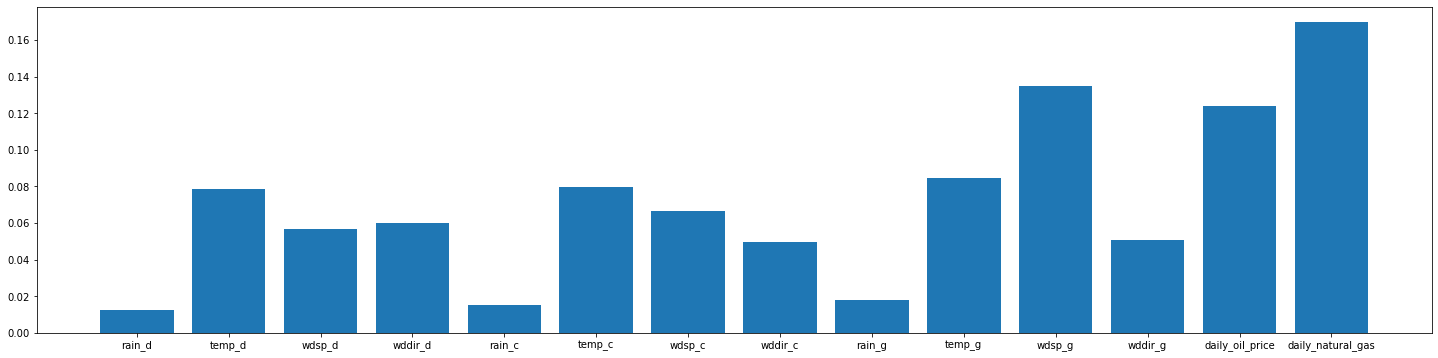

In [85]:
# plot feature importance
cols= rf_data.columns.tolist()
plt.figure(figsize=(25,6))
pyplot.bar([cols[x] for x in range(len(importance))], importance)
pyplot.show()

### Time based features

In [86]:
data.head()

,applicable_date,elec_prices,rain_d,temp_d,wdsp_d,wddir_d,rain_c,temp_c,wdsp_c,wddir_c,rain_g,temp_g,wdsp_g,wddir_g,daily_oil_price,daily_natural_gas
0,2019-01-01 00:00:00,70.28,0.0,8.8,4.626,250,0.0,8.5,2.056,240,0.0,9.9,2.056,260,59.41,2.62
1,2019-01-01 01:00:00,65.18,0.0,8.3,4.626,250,0.0,8.5,1.542,270,0.0,9.3,2.056,240,59.41,2.62
2,2019-01-01 02:00:00,60.91,0.0,8.4,4.112,240,0.0,8.4,1.542,280,0.0,9.2,2.570,240,59.41,2.62
3,2019-01-01 03:00:00,65.16,0.0,8.6,4.112,250,0.0,8.5,2.570,260,0.0,9.1,2.570,250,59.41,2.62
4,2019-01-01 04:00:00,65.16,0.0,8.4,5.140,250,0.0,8.5,2.570,270,0.0,8.8,2.056,250,59.41,2.62


In [87]:
data_= data.copy()
data_.shape

(7416, 16)

In [88]:
data_.iloc[-1]

applicable_date      2019-12-12 22:00:00
elec_prices                        37.04
rain_d                               0.2
temp_d                               4.2
wdsp_d                             9.766
wddir_d                              270
rain_c                               0.2
temp_c                               4.9
wdsp_c                             9.252
wddir_c                              280
rain_g                               0.5
temp_g                               5.3
wdsp_g                             5.654
wddir_g                              290
daily_oil_price                    66.67
daily_natural_gas                   2.04
Name: 7415, dtype: object

In [89]:
time_data= data_.copy()
time_data= time_data[['applicable_date','elec_prices']]
time_data.head()

,applicable_date,elec_prices
0,2019-01-01 00:00:00,70.28
1,2019-01-01 01:00:00,65.18
2,2019-01-01 02:00:00,60.91
3,2019-01-01 03:00:00,65.16
4,2019-01-01 04:00:00,65.16


In [90]:
#time_data['year']=time_data['applicable_date'].dt.year 
time_data['month']=time_data['applicable_date'].dt.month 
time_data['day']=time_data['applicable_date'].dt.day

time_data['dayofweek_num']=time_data['applicable_date'].dt.dayofweek
time_data['dayofyear_num']=time_data['applicable_date'].dt.dayofyear
time_data['weekofyear_num']=time_data['applicable_date'].dt.weekofyear
time_data['dayofweek_name']=time_data['applicable_date'].dt.day_name()

time_data['Hour'] = time_data['applicable_date'].dt.hour

time_data.head()

,applicable_date,elec_prices,month,day,dayofweek_num,dayofyear_num,weekofyear_num,dayofweek_name,Hour
0,2019-01-01 00:00:00,70.28,1,1,1,1,1,Tuesday,0
1,2019-01-01 01:00:00,65.18,1,1,1,1,1,Tuesday,1
2,2019-01-01 02:00:00,60.91,1,1,1,1,1,Tuesday,2
3,2019-01-01 03:00:00,65.16,1,1,1,1,1,Tuesday,3
4,2019-01-01 04:00:00,65.16,1,1,1,1,1,Tuesday,4


In [91]:
time_data.isnull().values.any()

False

time_data= time_data.drop(['year'], axis=1)
time_data.head()

In [92]:
time_data['dayofweek_num'].unique()

array([1, 2, 3, 4, 5, 6, 0], dtype=int64)

In [93]:
time_data['dayofyear_num'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [94]:
time_data['weekofyear_num'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 32, 33, 34, 35, 36, 37, 38,
       39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50], dtype=int64)

In [95]:
time_data['dayofweek_name'].unique()

array(['Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday',
       'Monday'], dtype=object)

In [96]:
time_data['Hour'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 20,
       21, 22, 23, 19, 16, 18, 17], dtype=int64)

In [97]:
x= time_data['elec_prices'].values
y = time_data['month'].values
calc_PCC(x,y,'month')

Pearsons correlation for month with electricity price: -0.244


In [98]:
y = time_data['day'].values
calc_PCC(x,y,'day')

Pearsons correlation for day with electricity price: -0.005


In [99]:
y = time_data['dayofweek_num'].values
calc_PCC(x,y,'dayofweek_num')

Pearsons correlation for dayofweek_num with electricity price: -0.128


In [100]:
y = time_data['Hour'].values
calc_PCC(x,y,'Hour')

Pearsons correlation for Hour with electricity price: 0.292


In [101]:
y = time_data['dayofyear_num'].values
calc_PCC(x,y,'dayofyear_num')

Pearsons correlation for dayofyear_num with electricity price: -0.244


In [102]:
y = time_data['weekofyear_num'].values
calc_PCC(x,y,'weekofyear_num')

Pearsons correlation for weekofyear_num with electricity price: -0.241


### correlation between dayofweek_name & price

In [103]:
from sklearn import preprocessing
day_name= time_data['dayofweek_name'].values
le = preprocessing.LabelEncoder()
labels= le.fit_transform(day_name)

In [104]:
len(labels)

7416

In [105]:
le.classes_

array(['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday'], dtype=object)

In [106]:
y = labels
calc_PCC(x,y,'dayofweek_name')

Pearsons correlation for dayofweek_name with electricity price: 0.039


### Random forest importance

In [107]:
time_data.head()

,applicable_date,elec_prices,month,day,dayofweek_num,dayofyear_num,weekofyear_num,dayofweek_name,Hour
0,2019-01-01 00:00:00,70.28,1,1,1,1,1,Tuesday,0
1,2019-01-01 01:00:00,65.18,1,1,1,1,1,Tuesday,1
2,2019-01-01 02:00:00,60.91,1,1,1,1,1,Tuesday,2
3,2019-01-01 03:00:00,65.16,1,1,1,1,1,Tuesday,3
4,2019-01-01 04:00:00,65.16,1,1,1,1,1,Tuesday,4


In [108]:
y= time_data['elec_prices']
X= time_data.drop(['applicable_date','elec_prices'], axis=1)
X['dayofweek_name']= labels
print(X.shape)
print(y.shape)

(7416, 7)
(7416,)


In [109]:
X.head()

,month,day,dayofweek_num,dayofyear_num,weekofyear_num,dayofweek_name,Hour
0,1,1,1,1,1,5,0
1,1,1,1,1,1,5,1
2,1,1,1,1,1,5,2
3,1,1,1,1,1,5,3
4,1,1,1,1,1,5,4


In [110]:
y.head()

0    70.28
1    65.18
2    60.91
3    65.16
4    65.16
Name: elec_prices, dtype: float64

In [111]:
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot

model = RandomForestRegressor()
model.fit(X, y)
importance = model.feature_importances_

for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.00951
Feature: 1, Score: 0.11358
Feature: 2, Score: 0.07361
Feature: 3, Score: 0.37492
Feature: 4, Score: 0.04324
Feature: 5, Score: 0.03568
Feature: 6, Score: 0.34946


In [112]:
X.columns.tolist()

['month',
 'day',
 'dayofweek_num',
 'dayofyear_num',
 'weekofyear_num',
 'dayofweek_name',
 'Hour']

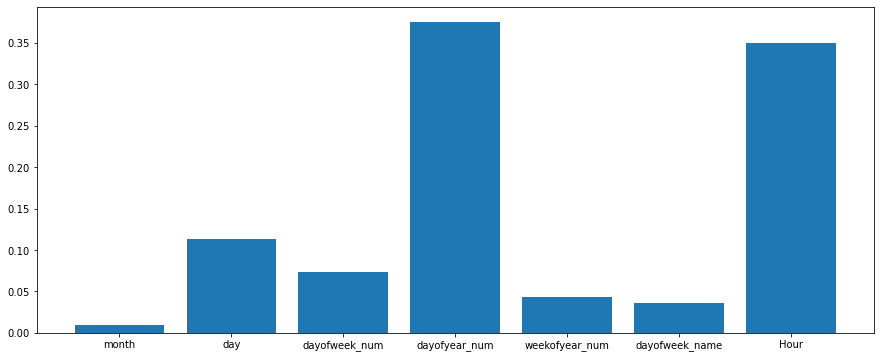

In [113]:
# plot feature importance
cols= X.columns.tolist()
plt.figure(figsize=(15,6))
pyplot.bar([cols[x] for x in range(len(importance))], importance)
pyplot.show()